# 机器学习(ML)与自然语义(NLP)处理

本次课程内容：
1. 机器学习处理的基本概念
    * 机器学习可以干什么？
    * 机器学习哪些还做得不好？
    * 机器学习的基本概念
        * 监督学习与非监督学习，半监督学习
        * 监督学习：回归与分类

2. 自然语义处理的目标与情感分析(sentimental analysis)
    * NLP的应用
    * 情感分析
    

4. 安装Anaconda, github, mendeley, nltk, jieba

5. Anaconda的使用模式与快捷键

6. 使用github

7. 使用nltk进行基本操作
    * 去stopwords
    * 分词
    
8. read: 使用jieba进行中文分词 [link](https://blog.csdn.net/u012052268/article/details/77825981)

9. 类似案例处理(Amazon fine food review评价预测)

# 1. 机器学习的基本概念

1.1 机器学习可以干什么？

![cat](./cat.jpg)

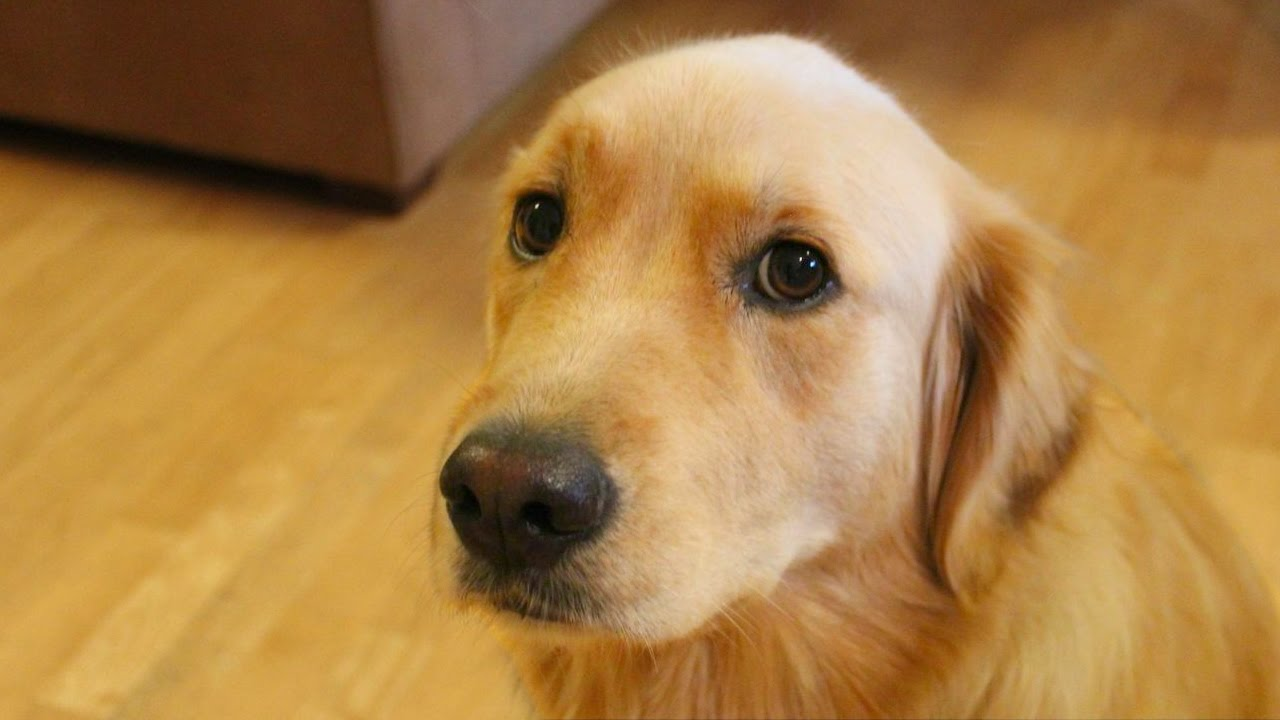

In [5]:
from IPython.display import Image
Image('./dog.jpg',width=500)

### 还可以干这些

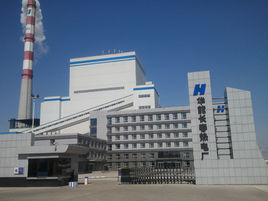

In [7]:
Image('./tubine.jpg',width=400)

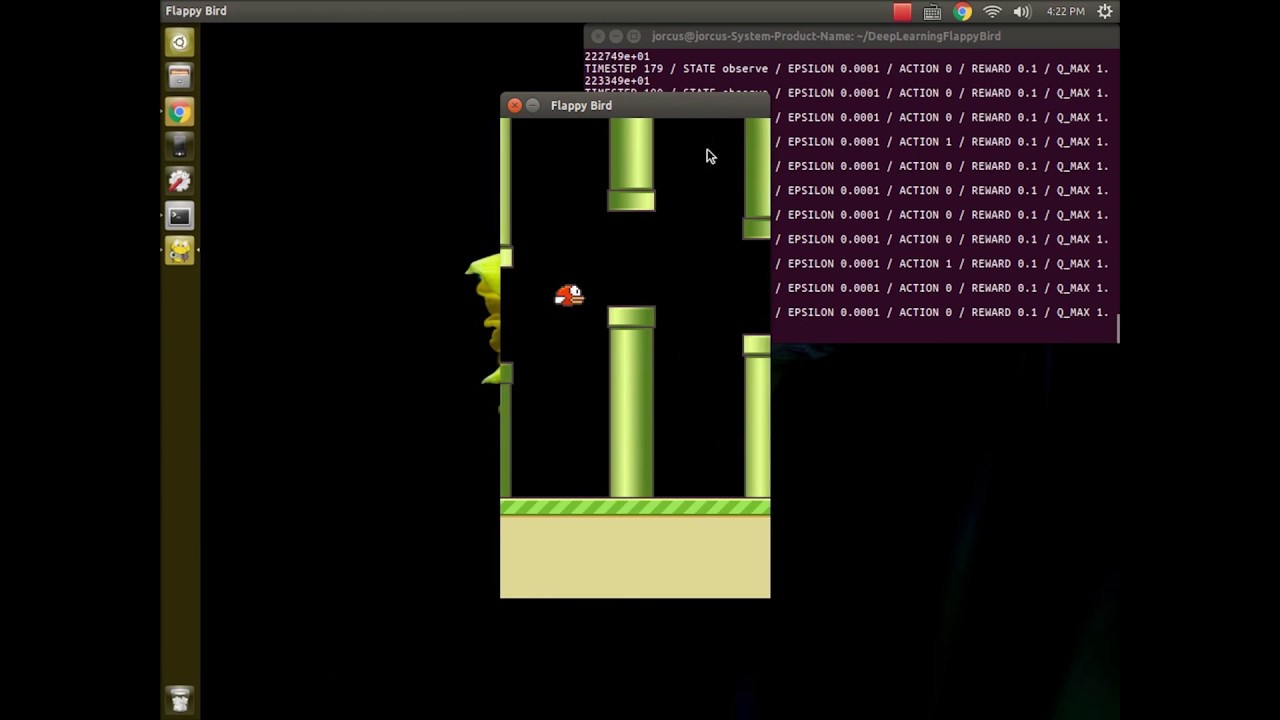

In [9]:
Image('./flappybird.jpg',width=800)

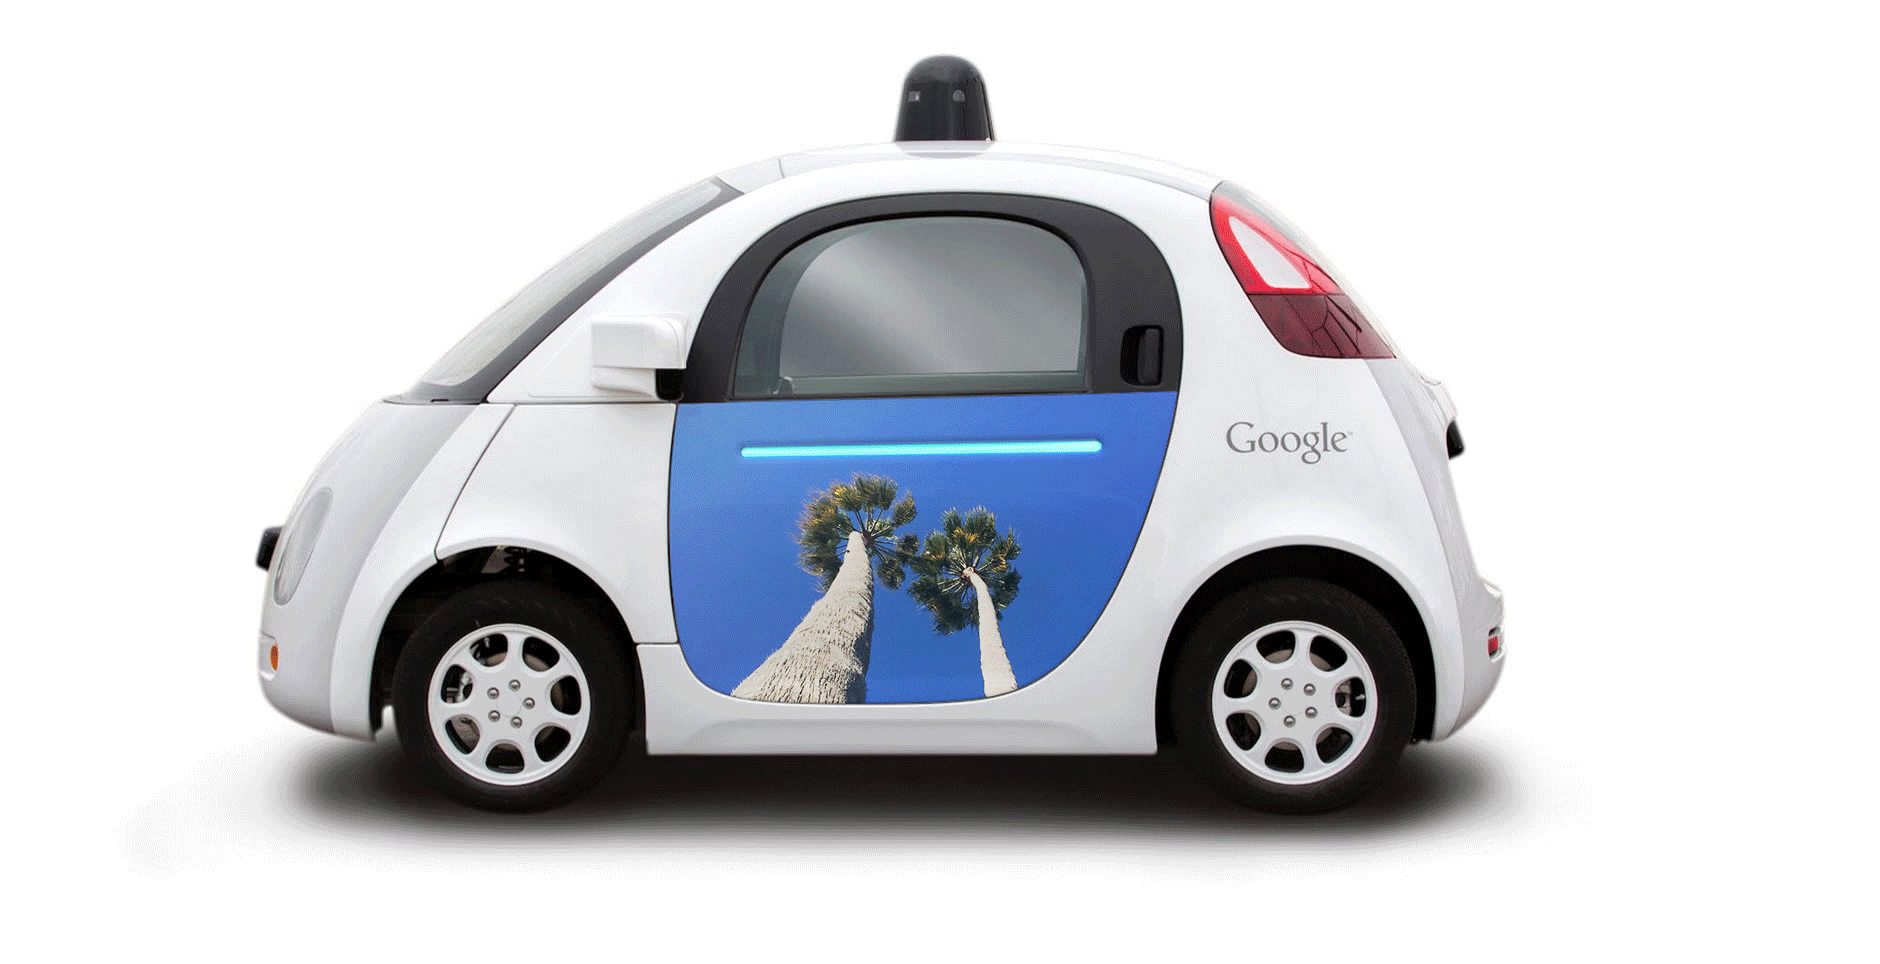

In [11]:
Image('./google-car.gif',width=600)

### 1.2 机器学习还有哪些做得不够好？

* 逻辑推理判断
* 抽象概念的构建
* 等等...


### 1.3 机器学习的基本概念

* 监督学习与非监督学习
    * 监督学习：有正确答案作参考
    * 非监督学习：没有正确答案作参考
    * 半监督学习：暂时不要管


* 监督学习：回归(regression)与分类(classification)
* **连续 vs 离散**

### 以下代码仅仅是为了展示方便，真正作回归分析不是这么做的！

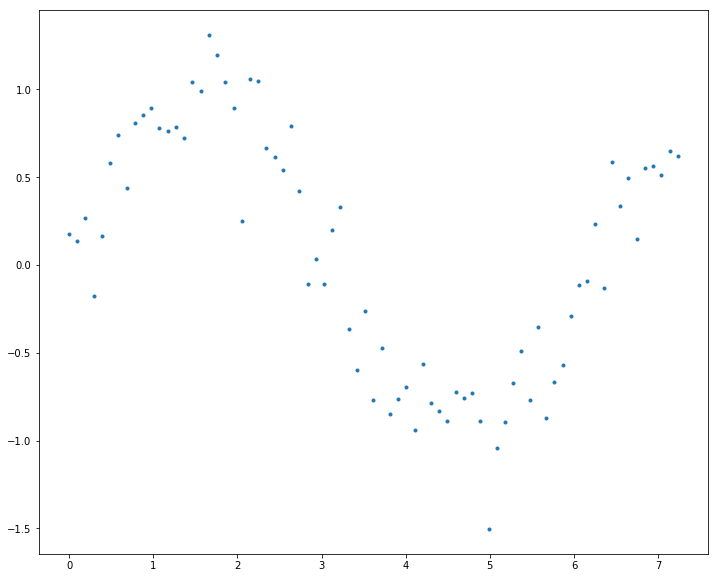

In [12]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

x = np.array([1.4*i*np.pi/180 for i in range(0,300,4)])
np.random.seed(20)  #随机数
y = np.sin(x) + np.random.normal(0,0.2,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')

In [17]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
print(data.head())

          x         y       x_2       x_3       x_4       x_5           x_6  \
0  0.000000  0.176779  0.000000  0.000000  0.000000  0.000000  0.000000e+00   
1  0.097738  0.136756  0.009553  0.000934  0.000091  0.000009  8.717508e-07   
2  0.195477  0.265742  0.038211  0.007469  0.001460  0.000285  5.579205e-05   
3  0.293215 -0.179621  0.085975  0.025209  0.007392  0.002167  6.355064e-04   
4  0.390954  0.164104  0.152845  0.059755  0.023362  0.009133  3.570691e-03   

            x_7           x_8           x_9          x_10          x_11  \
0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1  8.520356e-08  8.327663e-09  8.139328e-10  7.955252e-11  7.775339e-12   
2  1.090606e-05  2.131882e-06  4.167336e-07  8.146178e-08  1.592389e-08   
3  1.863402e-04  5.463780e-05  1.602064e-05  4.697497e-06  1.377378e-06   
4  1.395975e-03  5.457617e-04  2.133676e-04  8.341686e-05  3.261214e-05   

           x_12          x_13          x_14          x_15  
0  0.000000e+0

In [20]:
# 复杂度可变
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        #plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

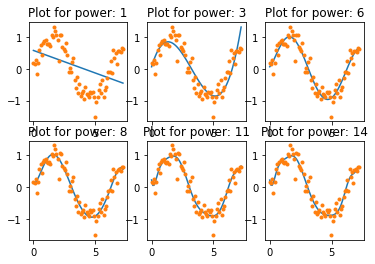

In [21]:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#定义作图的位置与模型的复杂度
models_to_plot = {1:231,3:232,6:233,8:234,11:235,14:236}

#画出来
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

* 分类问题 classification

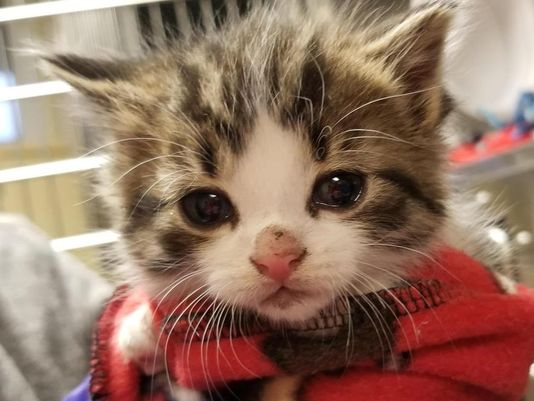

In [22]:
Image('./cat.jpg',width=400)

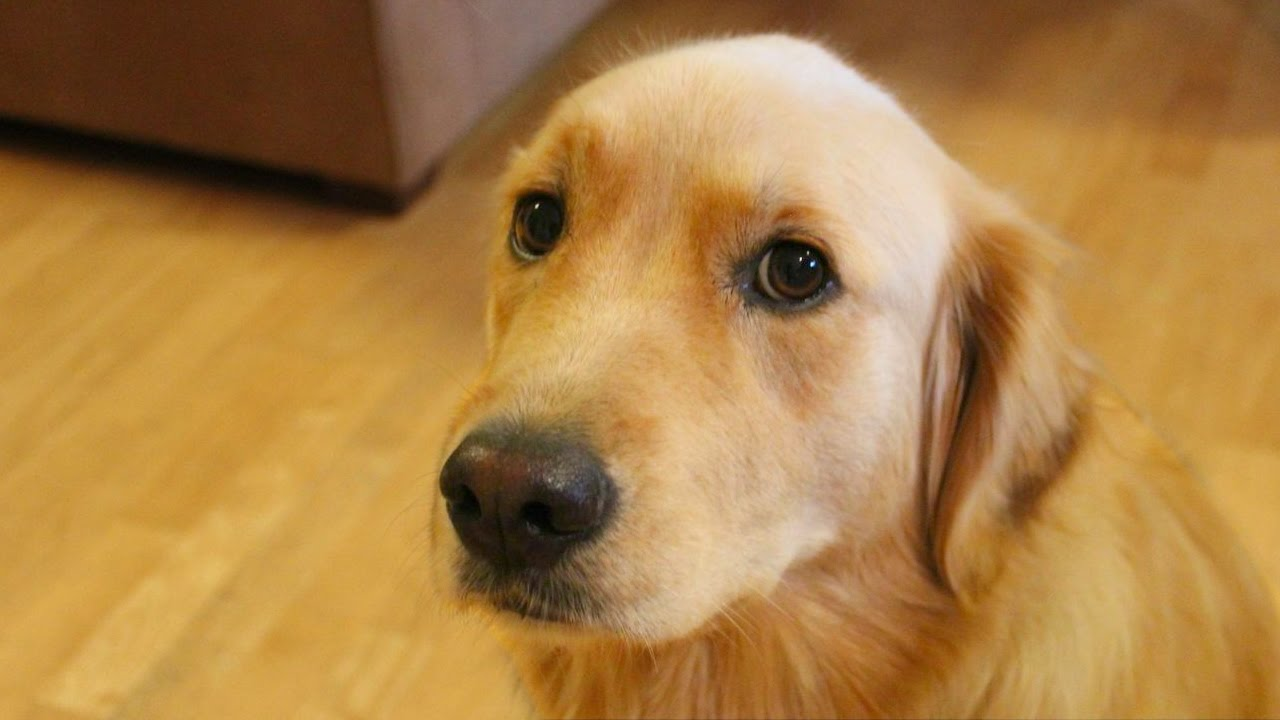

In [23]:
Image('./dog.jpg',width=400)

# 2. 自然语义处理的目标与情感分析(sentimental analysis)
* 2.1 NLP的应用
    * google AI助手打电话订餐
    * Amazon Alexa 根据语音指令调节室内开关
    * 百度翻译
    

* 2.2 情感分析
    * 911后的反恐与社交舆情监管需要
    * ‘这里的动物园太贴心了，专门把你送到卖动物饲料的小卖部，特地挑选出最贵的几种饲料，配上对小孩子的循循善诱，生怕让动物饿着了，这样的动物园才会蒸蒸日上啊！’
    
* 2.3 情感分析一般的流程
    * 去标点等符号
    * 分词
    * stopwords,去掉stopwords
    * 词干提取Stemming与词形还原Lemmatization
    * 建模
    * 结果对比

# 3. 本次leetcode项目的问题是什么？
[链接](https://www.lintcode.com/ai/movie-review-recognition/overview)

# 4. 安装Anaconda, github, mendeley, nltk, jieba
* Anaconda: python 3, 64 bit
* github: 在windows中使用 gitbash
* mendeley: 文献管理工具
* nltk： python NLP工具包
* jieba: 结巴分词工具


# 5. Anaconda的使用模式与快捷键


* 编辑模式与控制模式
    * 按ESC退出编辑模式，用鼠标点击cell或按回车进入编辑模式
* 编写python或编写markdown
    * ESC + Y vs ESC + M
* cell管理：
    * 控制模式中
        * B 在当前cell后添加新cell
        * A 在当前cell前添加新cell
        * X 剪切当前cell
        * V 将剪切的cell粘贴到当前cell后面
        * U 退回上一步
    * 运行当前cell
        * ctrl+enter 运行当前cell，光标不变
        * shift+enter 运行当前cell，并在之后新加cell，光标移到新cell中
    * 中断当前运行的cell
        * ctrl+c
* Markdown


# 6. 使用GitHub
* 全球最大同性交友平台（码工交流）
* version control
* git clone
* 输入用户邮箱和密码
* 改动代码
* git add 添加至暂存区
* git commit至版本库
* git push 至远端
* git pull 将远端的更新文件改动与本地同步

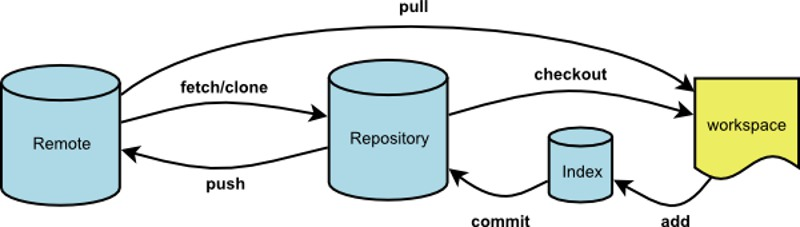

In [24]:
Image('./git.jpg',width=600)

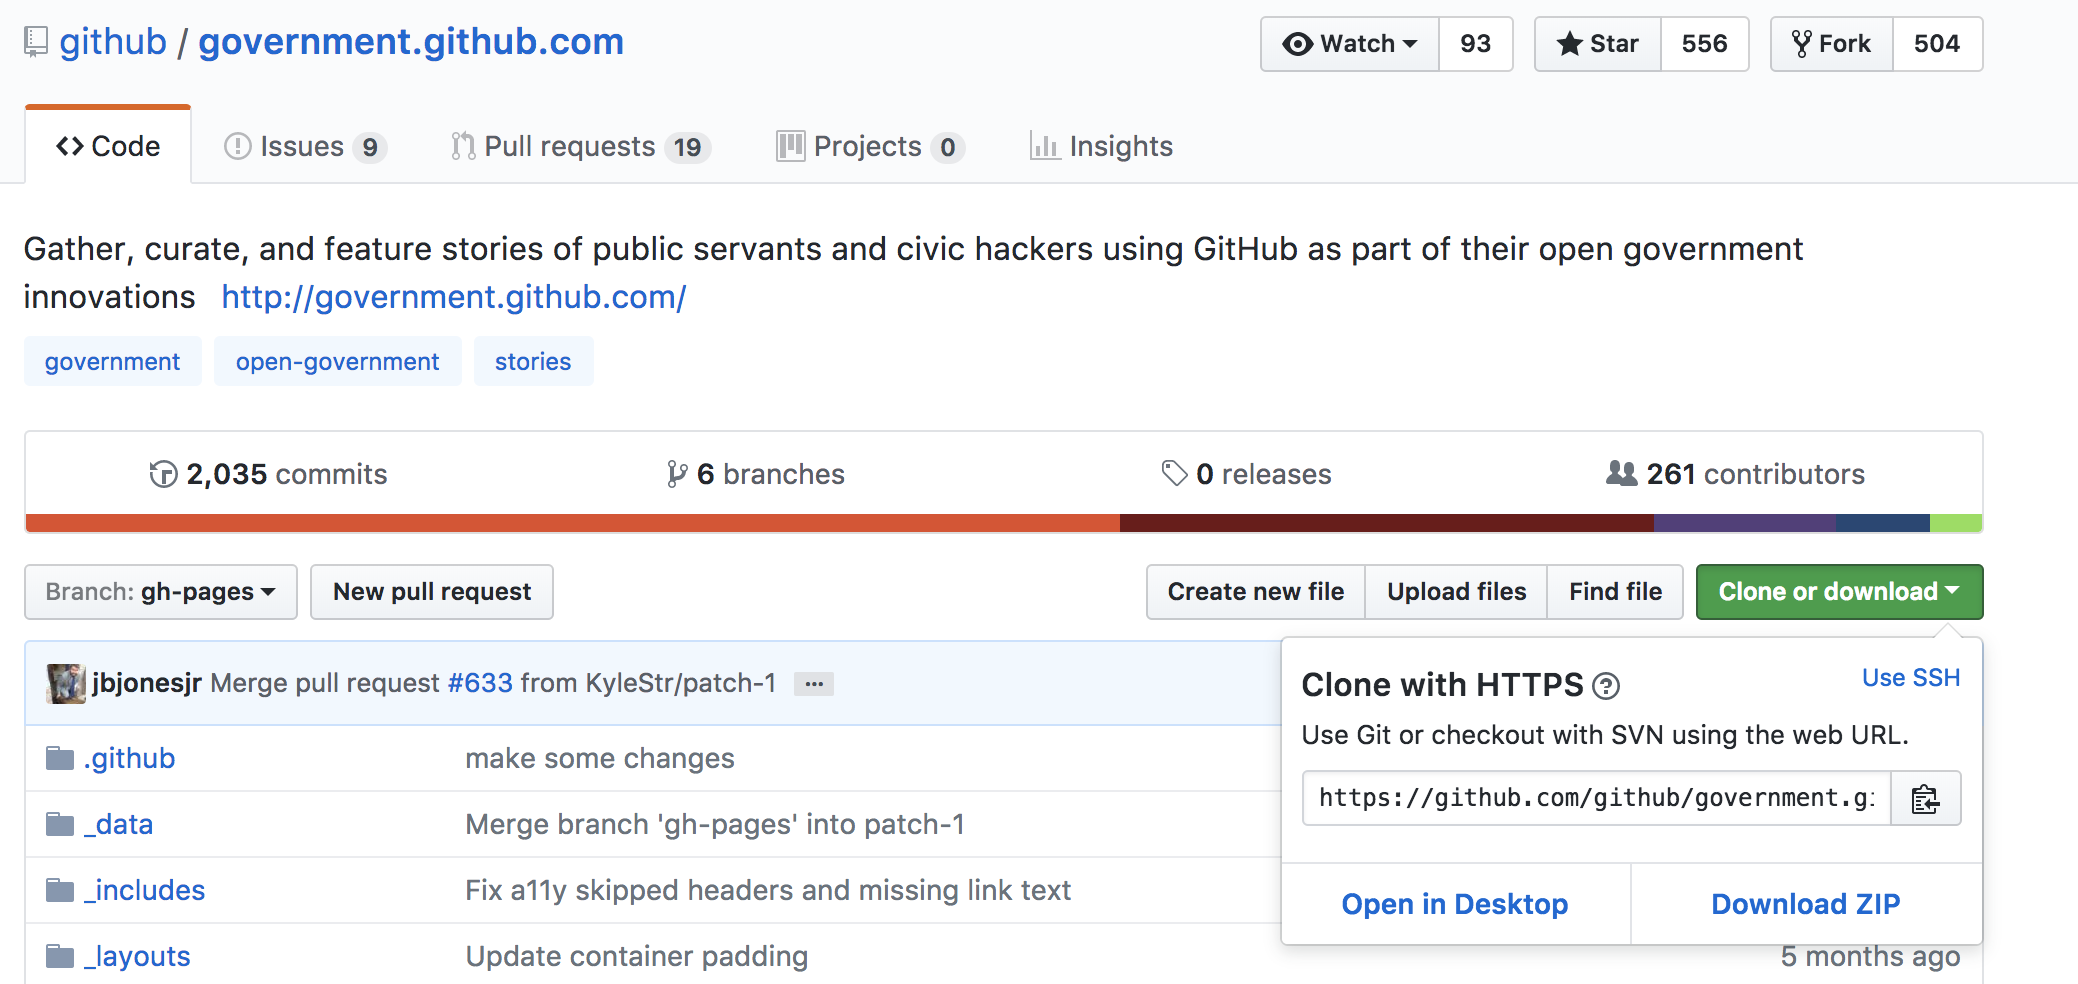

In [26]:
Image('./clone.png',width=800)

# 7. 使用nltk进行基本操作
    * Python文本操作
    * nltk 分词
    * nltk 去stopwords

## 7.1 Python文本操作
* 转义字符 \
* 文字拼接 s1+s2
* 文字长度 s.len()
* 取字母 s[3]
* 大小写 s.lower(), s.upper()
* 去除末尾空格 s.strip()
* 是不是字母s.isalpha()
* 是不是数字s.isdigit()
* 是不是空格s.isspace()
* 从哪里开始 s.startswith('other')
* 从哪里结束 s.endswith('other') 
* 查找相应字符 s.find('other')，返回首个字母的序号，若没有，就返回-1
* 替换 s.replace('old', 'new') 
* s.split(',')
* ' '.join(list) 

* 用\做转义符, 将文字中的特殊符号显示出来
    * word = 'I'm yours'
    * word = 'I\'m yours'

* 文字的拼接
    * words = 'Hello'+','+'Word'

* 文字长度
    * len()

* 取字母 s[3]

* 大小写 s.lower(), s.upper()

* 去除末尾空格 s.strip()

* 是不是字母s.isalpha(),是不是数字s.isdigit(),是不是空白s.isspace()

* 开始 s.startswith('other')


* 结束 s.endswith('other')

* 查找文字
    * sentens='I love beijing'
    * if 'beijing' in sentens
    * sentens.find('beijing')

In [ ]:
sentens='I love beijing'
if 'beijing' in sentens:
    print('lalalal')

* 替换 s.replace('old', 'new')

* 分割句子（英文）

In [ ]:
sentens.split()

* 打开文件
    * with open('trump.txt') as f

In [ ]:
with open('trump.txt') as f:
    for line in f:
        print(line)

## 7.2 nltk工具
分析特朗普总统任职演讲稿
* nltk一般使用
    * 共同出现的上下文 text.concordance
    * 词语的分布图 text.dispersion_plot
    * 
* 读取并简单计算特朗普总统的任职演讲稿

In [ ]:
import nltk
from nltk.book import *
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 读取
with open('trump.txt','r') as f:
    trump=f.read()

In [ ]:
trump

In [ ]:
# 分词
tokens = nltk.word_tokenize(trump)
text = nltk.Text(tokens)

In [ ]:
# 绘制关键词语分布图
text.dispersion_plot(['civilian','people','American'])

In [ ]:
# 查找最热的长度为2的短语
text.collocations()

In [ ]:
# 计算词频
text_fq = nltk.FreqDist(text)


In [ ]:
# 词汇累计统计图
text_fq.plot(30,cumulative=True)

In [ ]:
# 词汇丰富的程度
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [ ]:
lexical_diversity(text) #普朗特

In [ ]:
lexical_diversity(text2) #简 奥斯丁

In [ ]:
lexical_diversity(text4) #所有总统任职演说

In [ ]:
lexical_diversity(text7) # Wall Street J

# 8. read: 使用jieba进行中文分词 [link](https://blog.csdn.net/u012052268/article/details/77825981)


# 9. Amazon评论分析

* 大概思路：利用正负面描述的**词语频率**预测Amazon的商品评价
    1. 读取文字描述，查看大概数据情况
    2. 整理标签
    3. 整理summary文字，并建立语料库
    4. 建模
    5. 结果

In [28]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import sklearn as sk
import os,time,re,string
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics 

%matplotlib inline

### 9.1. 读取文字描述，查看大概数据情况

In [29]:
review_raw = pd.read_csv('./amazon/Reviews.csv')

In [30]:
review_raw.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [31]:
review_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [34]:
df_uni = pd.DataFrame(index = range(10),columns=['Feature', 'No. of NAs','No. of Unique Values', '# of total samples', 'Unique_Percentage(%)'])

for i, feat in enumerate(review_raw.columns.values):
    feat_na = review_raw[feat].isnull().sum(axis = 0)
    feat_uni = review_raw[feat].unique().shape[0]
    perc = feat_uni / n_samples * 100
    df_uni.iloc[i,:] = [feat, feat_na,feat_uni, n_samples, perc]
    
df_uni

ValueError: cannot copy sequence with size 3 to array axis with dimension 5

In [ ]:
review_raw['Summary'].isnull().sum()

In [ ]:
# 去掉Null值

review = review_raw.dropna()

### 9.2 整理label, 作为正负评价的标签


* 将结果分为两类: positive (score > 3) and negative (score <= 3)

In [ ]:
label = review['Score'].apply(lambda x: 1 if x > 3 else 0)

In [ ]:
label.head()

In [ ]:
#tmp_df = pd.DataFrame([1,2,3,4],index=list(range(4)),columns=['t'])
#tmp_df

In [ ]:
#tmp_df['t'].apply(lambda x: 10 if x%2==0 else 0)

### 9.3 整理summary文字栏


In [ ]:
summary = review['Summary']
summary.head(10)

#### 9.3.1 数据清洗: 去掉标点符号

In [ ]:
# 不要忘记import string
import string
string.punctuation

In [ ]:
# Python3 的用法
trantable = str.maketrans("","",string.punctuation)
def data_clean(text):
    text = text.lower()
    #要去掉的元素放到 text.translate的第二个参数中
    text_clean = text.translate(trantable)
    return text_clean

In [ ]:
# 例子: 
s = '自然语义处理##* &@好玩,@*$ @*我*@#!要好好学'
print(s)
print(data_clean(s))

In [ ]:
summary = summary.apply(lambda x: data_clean(x))

#### 9.3.2 分词 tokenize

In [ ]:
from nltk import word_tokenize

In [ ]:
# 取一部分做一个展示
demo = summary[:5000]

In [ ]:
corpus_w_stopword = [word_tokenize(text) for text in demo]

In [ ]:
corpus_w_stopword[:10]

#### 9.3.3 Stopwords，去掉stopwords

In [ ]:
from nltk import FreqDist
from nltk.corpus import stopwords

In [ ]:
stopwords.words('english')

In [ ]:
def remove_stopword(text):
    return [word for word in text if word not in stopwords.words('english')]

去除停用词，创建新的词库

corpus_wo_stopword = [remove_stopword(text) for text in corpus_w_stopword]


corpus_wo_stopword[:10]

- See the difference? 
- 去掉了 'not'这类词，这类用词会严重影响情感分析，可行的处理方式？

corpus_wo_h = np.hstack(corpus_wo_stopword)

list.append()

list.extend()

In [ ]:
# 计算有多少不重复的词汇:
corpus_wo_h = np.hstack(corpus_wo_stopword)
corpus_w_h = np.hstack(corpus_w_stopword)

print("考虑停止词，不重复词汇有%d"%(len(set(corpus_w))))
print("不考虑停止次，不重复的词汇有%d"%(len(set(corpus_wo))))

#### 9.3.4 词干提取与词性还原

In [ ]:
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer

In [ ]:
porter = PorterStemmer()
wnl = WordNetLemmatizer()

print("stemmer: 'eating' ->%d"%(porter.stem('eating')))

print("lemmatization: 'feet' -> %d"%(wnl.lemmatize('feet')))

In [ ]:
stem_wo = [porter.stem(word) for word in corpus_wo_h]
lem_wo = [wnl.lemmatize(word) for word in corpus_wo_h]

#### 9.3.5 清洗结果对比

* 提取词干，还原词性

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x = ['raw data','after stemming', 'after lemmatization'], 
            y = [len(set(corpus_wo_h)), len(set(stem_wo)), len(set(lem_wo))]) 
plt.ylabel('count')
plt.show()


* 去除stopwords后的词频

In [ ]:

fdist_wo = pd.DataFrame(list(FreqDist(corpus_wo_h).items()), columns=['单词without', '词频without'])
fdist_wo.sort_values(by = '词频without',inplace=True, ascending=False)

fdist_w = pd.DataFrame(list(FreqDist(corpus_w_h).items()), columns=['单词with', '词频with'])
fdist_w.sort_values(by = '词频with',inplace=True, ascending=False)

In [ ]:
fdist_wo.head()

In [ ]:
#fdist_w.head(10)
fdist_w.head(5)

In [ ]:
# 可视化结果

fig, (ax1,ax2) = plt.subplots(1,2,sharey = True, figsize = (10,5))

sns.barplot(x = fdist_w['单词with'][:10],
            y =fdist_w['词频with'][:10], 
            palette='Blues_d',
            ax = ax1, 
            label = 'with stopwords') 

sns.barplot(x = fdist_wo['单词without'][:10],
            y =fdist_wo['词频without'][:10], 
            palette='Greens_d', 
            ax = ax2, 
            label = 'without stopwrods') 

ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')

plt.tight_layout()
plt.show()

### 9.4 建模
* 数据预处理
* tfidf处理，转化成频率
* 调用具体模型

In [ ]:
def stem_tokens(tokens, stemmer = PorterStemmer()):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    #tokens = [word for word in tokens if word not in stopwords.words('english')]
    stems = stem_tokens(tokens)
    return ' '.join(stems)

def build_corpus(dataset):
    corpus = []
    for text in dataset:
        # without the decoding, there will be UnicodeDecodeError when tokenizing
        corpus.append(tokenize(text))  
    return corpus

In [ ]:
# 在第二步时已经去除了标点
n=10000
X = summary[:n]
y = label[:n]


In [ ]:
seed = 2018
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [ ]:
train_token = build_corpus(X_train)
test_token = build_corpus(X_test)

In [ ]:
train_token[:10]

#### 9.4.2 进一步处理：sklearn TfidfVectorizer (以后会详细讲)


In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer()

X_train_tfidf_vec = tfidf_vec.fit_transform(train_token)
X_test_tfidf_vec = tfidf_vec.transform(test_token)

#查看结果

for item in X_test_tfidf_vec:

    print(item)
    
    print("---")

X_train_tfidf_vec的大小 X_train_tfidf_vec.shape

有哪些词语？tfidf_vec.get_feature_names()

#### 9.4.3 调用具体模型 train & predict

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


#### 逻辑回归

In [ ]:
lr = LogisticRegression().fit(X_train_tfidf_vec, y_train)
ypred_lr = lr.predict(X_test_tfidf_vec)

print(lr)
print('training F1_score: %3f'% metrics.f1_score(y_train, lr.predict(X_train_tfidf_vec)))
print('validation F1_score: %3f' % metrics.f1_score(y_test, ypred_lr))
print('precision: %3f'% metrics.precision_score(y_test, ypred_lr))
print('recall: %3f'% metrics.recall_score(y_test, ypred_lr))
print('auc %3f:'% metrics.roc_auc_score(y_test, ypred_lr))

print(confusion_matrix(y_test, ypred_lr))

#### 与RandomForestClassifier对比

In [ ]:
models = {}
models['lgr'] = LogisticRegression()
models['RF'] = RandomForestClassifier(n_estimators= 50, max_depth = 10)


In [ ]:
results = pd.DataFrame(index=models.keys(), columns=['f1_score','precision_score','recall_score','auc'])

for (clf_name, clf) in models.items():
    clf.fit(X_train_tfidf, y_train)
    ypred = clf.predict(X_test_tfidf)
    f1score = metrics.f1_score(y_test, ypred)
    precision = metrics.precision_score(y_test, ypred)
    recall = metrics.recall_score(y_test, ypred)
    auc = metrics.roc_auc_score(y_test, ypred)  

    print clf
    print 'f1_score: %3f' % f1score
    print 'precision: %3f'%precision
    print 'recall: %3f'%recall
    print 'auc %3f:\n'%auc
    
    results.loc[clf_name,:] = [f1score, precision, recall, auc] 

In [ ]:
results